In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
credit = pd.read_csv('german_credit.csv')
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
print("Shape of the data -" , credit.shape)

Shape of the data - (1000, 21)


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [6]:
credit.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
print ("Number of missing values :" , credit.isna().sum().sum())

Number of missing values : 0


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
# Lets build a Ensemble model but need to modify the dataset first
model_data = pd.get_dummies(credit)
model_data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [9]:
# Print Shape of model data 
print ("Shape of the data Frame after get_dummies :",model_data.shape)

Shape of the data Frame after get_dummies : (1000, 62)


### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
credit.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


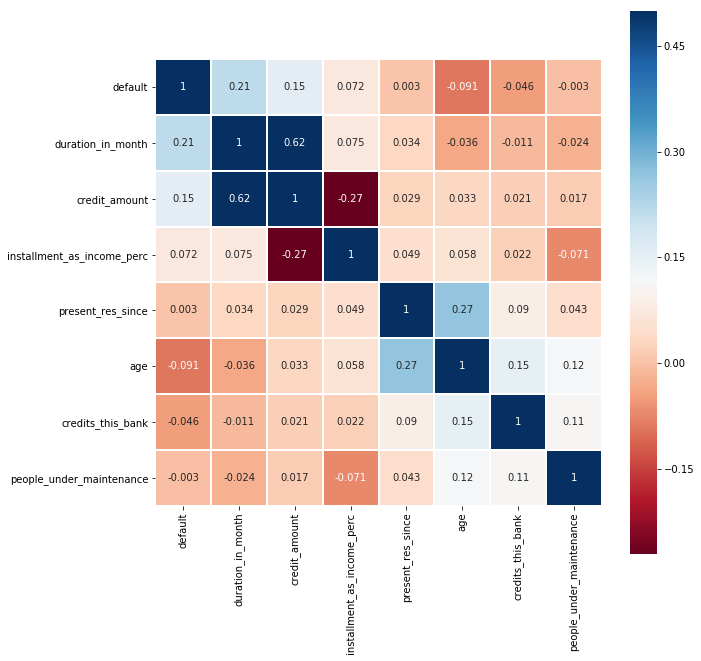

In [11]:
colormap = plt.cm.RdBu
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(credit.corr(),annot = True,linewidths=1,square=True,cmap=colormap,vmax=0.5)

### Drop the original variables which are converted to dummy

In [12]:
df = pd.get_dummies(credit, drop_first=True)
print ("Shape of data after dropping original variables which are converted to dummy" , df.shape) 
df.head()

Shape of data after dropping original variables which are converted to dummy (1000, 49)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


In [13]:
model_data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('default',axis = 1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)
print ("X_train shape :", X_train.shape)
print ("y_train shape :", y_train.shape)
print ("X_test shape :", X_test.shape)
print ("y_test shape :", y_test.shape)

X_train shape : (700, 48)
y_train shape : (700,)
X_test shape : (300, 48)
y_test shape : (300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [16]:
# Import metrics on to check model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Accuracy of Random forrest model
print('Accuracy of RandomForrest model is -', accuracy_score(y_test,predictions))

# Use the confusion matrix to check TP and TN values
print('\n******** Confusion Matrix : *********\n', confusion_matrix(y_test,predictions))

# Use the classification Report to check recall and precision
print('\n**************** Classification Report : *******************\n', classification_report(y_test,predictions))

Accuracy of RandomForrest model is - 0.7466666666666667

******** Confusion Matrix : *********
 [[194  21]
 [ 55  30]]

**************** Classification Report : *******************
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       215
           1       0.59      0.35      0.44        85

   micro avg       0.75      0.75      0.75       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.73      0.75      0.72       300



### Q6 Show the list of the features importance( 1 Marks)

In [17]:
importances = rf.feature_importances_
print(list(importances))
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

[0.09046306140752806, 0.11106889295363584, 0.03899883485897858, 0.03902274837473499, 0.0931677686542467, 0.020393442479838302, 0.013200961149449249, 0.031396682651849875, 0.00828485214911012, 0.05669737901196592, 0.02302367904340651, 0.011050208424356483, 0.016825805219684197, 0.015622196428411086, 0.009913823515368519, 0.020155827314286025, 0.011265405558041003, 0.016763773189086836, 0.0036787857303558695, 0.001875873353670901, 0.015542246264056134, 0.001898594371289876, 0.0004755497168417929, 0.02480103610420363, 0.011328049654481703, 0.006664045502237208, 0.017665809872972508, 0.016043925629994817, 0.016977293939780026, 0.013995009441868121, 0.01066676641843112, 0.007131559491690722, 0.009414563339538487, 0.02032880298075877, 0.008050589748017273, 0.012154115062405761, 0.017720853014820927, 0.016295326996844273, 0.015793281596277128, 0.026430745064729724, 0.008762513158748965, 0.015420445464915566, 0.011956754792248248, 0.01887918446032667, 0.0025245677760478923, 0.01304595890736271

In [18]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.111069)
2. feature 4 (0.093168)
3. feature 0 (0.090463)
4. feature 9 (0.056697)
5. feature 3 (0.039023)
6. feature 2 (0.038999)
7. feature 7 (0.031397)
8. feature 39 (0.026431)
9. feature 23 (0.024801)
10. feature 10 (0.023024)
11. feature 46 (0.021337)
12. feature 5 (0.020393)
13. feature 33 (0.020329)
14. feature 15 (0.020156)
15. feature 43 (0.018879)
16. feature 36 (0.017721)
17. feature 26 (0.017666)
18. feature 28 (0.016977)
19. feature 12 (0.016826)
20. feature 17 (0.016764)
21. feature 37 (0.016295)
22. feature 27 (0.016044)
23. feature 38 (0.015793)
24. feature 13 (0.015622)
25. feature 20 (0.015542)
26. feature 41 (0.015420)
27. feature 29 (0.013995)
28. feature 6 (0.013201)
29. feature 45 (0.013046)
30. feature 35 (0.012154)
31. feature 42 (0.011957)
32. feature 24 (0.011328)
33. feature 16 (0.011265)
34. feature 11 (0.011050)
35. feature 30 (0.010667)
36. feature 14 (0.009914)
37. feature 32 (0.009415)
38. feature 40 (0.008763)
39. feature 8

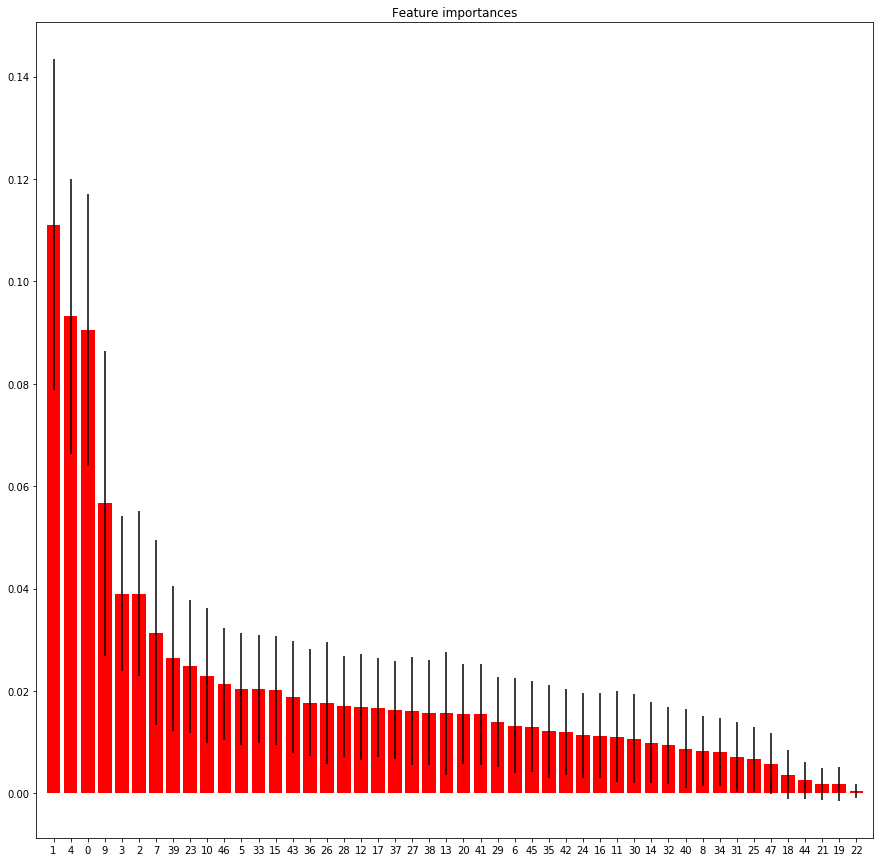

In [19]:
# Plot the feature importances of the forest
plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
# Use below values
num_folds = 10
seed = 77

In [22]:
#Validate the Random Forest model build above using k fold

In [23]:
myList =  list(range(10,20))
cv_scores = []
max_depth = []
for k in myList:
    rf = RandomForestClassifier(max_depth=k,random_state=seed)
    scores = cross_val_score(rf, X_train, y_train, cv=num_folds, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print("The optimal number of max_depth is : \n%d" % best_k)
np.mean(cv_scores)

The optimal number of max_depth is : 
18


0.7392202490304143

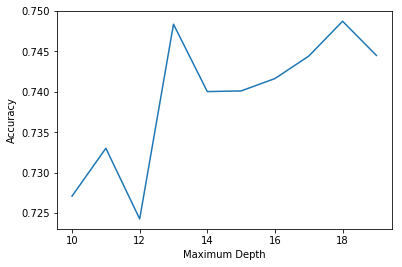

In [24]:
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

In [25]:
#Calculate Mean score
print("Mean score of accuracy\n",np.mean(cv_scores))

Mean score of accuracy
 0.7392202490304143


In [26]:
# Calculate score standard deviation using std()

In [27]:
np.array(cv_scores).std()

0.008024616960510881

# Q8 Print the confusion matrix( 1 Marks)

In [28]:
rf_final = RandomForestClassifier(max_depth=18,n_estimators=500,criterion="entropy",random_state=1,min_samples_leaf = 1)
rf_final.fit(X_train,y_train)
predicted = rf_final.predict(X_test)

# Accuracy of Random forrest model
print('Accuracy of RandomForrest model is :', accuracy_score(y_test,predicted))

# Use the confusion matrix to check TP and TN values
print('\n*** Confusion Matrix : ***\n', confusion_matrix(y_test,predicted))


Accuracy of RandomForrest model is : 0.76

*** Confusion Matrix : ***
 [[196  19]
 [ 53  32]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [29]:
# Use the classification Report to check recall and precision
print('\n**************** Classification Report : *******************\n', classification_report(y_test,predicted))


**************** Classification Report : *******************
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       215
           1       0.63      0.38      0.47        85

   micro avg       0.76      0.76      0.76       300
   macro avg       0.71      0.64      0.66       300
weighted avg       0.74      0.76      0.74       300



Recall:
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).

Recall is given by the relation: Tp/ Tp+Fn

Precision:
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).
Precision is given by the relation: Tp/ Tp+Fp


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [30]:
#Hint: Use roc_curve
y_pred_prob = rf_final.predict_proba(X_test)[:, 1]

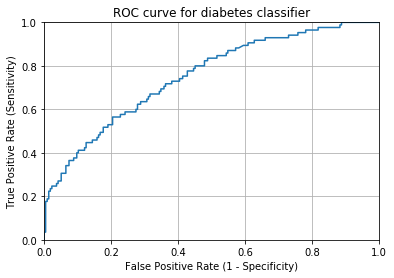

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [32]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.7512722298221615

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.7512722298221615

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [34]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [35]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf.fit(X_, y_)
    y_pred = rf.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [36]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7336666666666666
Standard deviation:  0.008359957469322951
